<a href="https://colab.research.google.com/github/NCAR/lrose-solo-python/blob/main/TestSolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Workspace

Install Miniconda, create environment, install pyArt and relevant dependencies

In [27]:
print('\x1b[32mInstalling Miniconda...\x1b[0m')
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

print('\x1b[32mUpdating Conda...\x1b[0m')
! conda update -y -n base -c defaults conda
print('\x1b[32mCreating environment...\x1b[0m')
! conda create -y -n pyart_env -c conda-forge python=3.8 arm_pyart
print('\x1b[32mInstalling Cartopy...\x1b[0m')
! conda install -y -c conda-forge cartopy
print('\x1b[32mInstalling PyArt...\x1b[0m')
! conda install -y -c conda-forge arm_pyart
print('\x1b[32mInstalling Pip...\x1b[0m')
! conda install pip -y
import google.colab
google.colab.output.clear()
print('\x1b[32mSuccessfully installed dependencies!\x1b[0m')


Import the libraries installed above

In [28]:
import netCDF4
import pyart
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from copy import deepcopy

Install and import the PySolo package

In [83]:
! pip uninstall -y pysolo-wip
! pip install -i https://test.pypi.org/simple/ pysolo-wip==0.0.81
# 63 is good, 65 is bad
import pysolo_package as solo

Found existing installation: pysolo-wip 0.0.81
Uninstalling pysolo-wip-0.0.81:
  Successfully uninstalled pysolo-wip-0.0.81
Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 136 kB 3.2 MB/s 


# Testing despeckle with sample data

In [30]:
# sample data 1
input_data = [3, 4, 5, 6]
bad = -3
a_speckle = 1
dgi_clip_gate = 4
boundary_mask = [True, True, True, True]

expected_data = [3, 4, 5, 6] # no change

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct (no change)")

Correct (no change)


In [31]:
# sample data 2
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 2
boundary_mask = [True, True, True, True]

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct (no change)")

Correct (no change)


In [32]:
# sample data 3
input_data = [-3, -3, 5, -3]
bad = -3
a_speckle = 1
dgi_clip_gate = 3
boundary_mask = [True, True, True, True]

expected_data = [-3, -3, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct (no change)")

Correct (no change)


In [33]:
# sample data 4
input_data = [3,-3, 5, 5, 5, -3 ,6]
bad = -3
a_speckle = 3
dgi_clip_gate = 7
boundary_mask = [True, True, True, True, True, True, True]

expected_data = [-3,-3,-3,-3,-3,-3, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")
input_data

Correct


[3, -3, 5, 5, 5, -3, 6]

In [34]:
# sample data 5
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, True, True, True, True, True, True, True, True]

expected_data = [-3, -3, -3, -3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [35]:
# sample data 6
input_data = [3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, False, False, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [36]:
# sample data 7
input_data = [3,-3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 8
boundary_mask = [True, True, True, True, False, False, False, False, False, False]

expected_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [37]:
# sample data 8
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.0
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [38]:
# sample data 9
input_data = [-3, -3, -3, 5, 5, 5, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, True, True, True, True, True, True, False, False]

expected_data = [-3, -3, -3,-3,-3,-3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [39]:
# sample data 10
input_data = [5, -3, -3, -3, 5, 5, -3]
bad = -3
a_speckle = 3
dgi_clip_gate = 5
boundary_mask = [True, True, True, True, True, True, True]

expected_data = [-3, -3, -3, -3, 5, 5, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [40]:
# sample data 11
input_data = [-3,  5,  5, -3, -3, 5, 5]
bad = -3
a_speckle = 3
dgi_clip_gate = 5
boundary_mask = [False, False, True, True, True, True, False]

expected_data = [-3, 5, 5, -3, -3, 5, 5]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data == expected_data
print("Correct")

Correct


In [41]:
# sample data 8.2 testing with slight error in float value for bad data
input_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, 5.0, 5.0, -3.0]
bad = -3.000002
a_speckle = 3
dgi_clip_gate = 10
boundary_mask = [False, False, False, False, False, False, True, True, True, True]

expected_data = [-3.0, -3.0, -3.0, 5.0, 5.0, 5.0, -3.0, -3.0, -3.0, -3]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask, dgi_clip_gate)
assert output.data != expected_data
print("Correct")

Correct


In [42]:
input_data =    [12.479999542236328, 23.889999389648438, 20.209999084472656, 13.960000038146973, 2.569999933242798, 6.71999979019165, 19.020000457763672, 19.739999771118164, 19.829999923706055, 22.59000015258789, 22.850000381469727, 25.649999618530273, 26.19999885559082, 25.619998931884766, 25.09000015258789, 24.779998779296875, 24.489999771118164, 24.26999855041504, 24.469999313354492, 25.06999969482422, 24.8799991607666, 21.920000076293945, 20.6299991607666, 22.969999313354492, 17.869998931884766, 22.28999900817871, 17.989999771118164, 19.779998779296875, 21.639999389648438, 20.649999618530273, 17.719999313354492, 11.960000038146973, 5.730000019073486, 4.309999942779541, -21.09000015258789, -24.1299991607666, -32768.0, -32768.0, -26.420000076293945, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, 40.45000076293945, 41.45000076293945, 39.05999755859375, 28.369998931884766, 44.959999084472656, 43.95000076293945, 44.369998931884766, 45.099998474121094, 49.37999725341797, 44.38999938964844, 50.849998474121094, 52.72999954223633, 74.29000091552734, 70.76000213623047, -32768.0, -32768.0]
bad = -32768.0
a_speckle = 2
boundary_mask = [True] * len(input_data)
expected_data = [12.479999542236328, 23.889999389648438, 20.209999084472656, 13.960000038146973, 2.569999933242798, 6.71999979019165, 19.020000457763672, 19.739999771118164, 19.829999923706055, 22.59000015258789, 22.850000381469727, 25.649999618530273, 26.19999885559082, 25.619998931884766, 25.09000015258789, 24.779998779296875, 24.489999771118164, 24.26999855041504, 24.469999313354492, 25.06999969482422, 24.8799991607666, 21.920000076293945, 20.6299991607666, 22.969999313354492, 17.869998931884766, 22.28999900817871, 17.989999771118164, 19.779998779296875, 21.639999389648438, 20.649999618530273, 17.719999313354492, 11.960000038146973, 5.730000019073486, 4.309999942779541, -21.09000015258789, -24.1299991607666, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, 40.45000076293945, 41.45000076293945, 39.05999755859375, 28.369998931884766, 44.959999084472656, 43.95000076293945, 44.369998931884766, 45.099998474121094, 49.37999725341797, 44.38999938964844, 50.849998474121094, 52.72999954223633, 74.29000091552734, 70.76000213623047, -32768.0, -32768.0]

# run despeckle
output = solo.despeckle(input_data, bad, a_speckle, boundary_mask)
print(output.data)
assert output.data == expected_data
print("Correct")

[12.479999542236328, 23.889999389648438, 20.209999084472656, 13.960000038146973, 2.569999933242798, 6.71999979019165, 19.020000457763672, 19.739999771118164, 19.829999923706055, 22.59000015258789, 22.850000381469727, 25.649999618530273, 26.19999885559082, 25.619998931884766, 25.09000015258789, 24.779998779296875, 24.489999771118164, 24.26999855041504, 24.469999313354492, 25.06999969482422, 24.8799991607666, 21.920000076293945, 20.6299991607666, 22.969999313354492, 17.869998931884766, 22.28999900817871, 17.989999771118164, 19.779998779296875, 21.639999389648438, 20.649999618530273, 17.719999313354492, 11.960000038146973, 5.730000019073486, 4.309999942779541, -21.09000015258789, -24.1299991607666, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -3276

# Extract real data from file

Load data file from Cloud and save to object

In [95]:
! wget -O radar_data.nc https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0
data = netCDF4.Dataset("/content/radar_data.nc")

--2021-06-08 18:05:47--  https://www.dropbox.com/s/lltr0hyt3excg2g/radar_data.nc?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lltr0hyt3excg2g/radar_data.nc [following]
--2021-06-08 18:05:47--  https://www.dropbox.com/s/raw/lltr0hyt3excg2g/radar_data.nc
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc85846099c88cc3cc846c80a1b8.dl.dropboxusercontent.com/cd/0/inline/BQBQx2T-0xmqb4nnZDwd7FHBbUDQudPG0SO_Si-dbMWZYqn2ldkUYID6q5gmsf5yTl6XJVUPPAK-bd0iagBO5e0Yj-NaFW_C_qqjgKpOSJBcynFecN0PT_UUkFE23hA1UkrerYxir61ulppeMwjlfthT/file# [following]
--2021-06-08 18:05:47--  https://uc85846099c88cc3cc846c80a1b8.dl.dropboxusercontent.com/cd/0/inline/BQBQx2T-0xmqb4nnZDwd7FHBbUDQudPG0SO_Si-dbMWZYqn2ldkUYID6q5gmsf5yTl6XJVUPPAK-bd0iag

Read NetCDF file, save result to Radar object

In [96]:
# Read the NetCDF data.
radar = pyart.io.read("/content/radar_data.nc")

Retrieve all fields from Data

In [97]:
print(list(radar.fields.keys()))

['DBZ_TOT', 'DBZ', 'VEL', 'WIDTH', 'SQI', 'VG', 'VR', 'SW', 'NCP', 'ZZ', 'VV', 'V1', 'DBZTEST', 'VGTEST', 'Z1', 'ZC', 'VC']


Extract the rays from 'ZZ' and 'VV' fields. This returns the missing value and a list of lists of data and corresponding masks

In [98]:
print("[ZZ]".center(40, '='))
missing_ZZ = radar.fields['ZZ']['data'].fill_value
rays_data_ZZ = radar.fields['ZZ']['data'].tolist(missing_ZZ)
print("[ZZ] Missing Value: %d" % missing_ZZ)
print("[ZZ] Number of Rays: %d" % len(rays_data_ZZ))
print("[ZZ] Number of Gates per Ray: %d\n" % len(rays_data_ZZ[0]))

print("[VV]".center(40, '='))
missing_VV = radar.fields['VV']['data'].fill_value
rays_data_VV = radar.fields['VV']['data'].tolist(missing_VV)
print("[VV] Missing Value: %d" % missing_VV)
print("[VV] Number of Rays: %d" % len(rays_data_VV))
print("[VV] Number of Gates per Ray: %d\n" % len(rays_data_VV[0]))

rays_mask_ZZ = radar.fields['ZZ']['data'].mask.tolist()

==================[ZZ]==================
[ZZ] Missing Value: -32768
[ZZ] Number of Rays: 360
[ZZ] Number of Gates per Ray: 627

==================[VV]==================
[VV] Missing Value: -32768
[VV] Number of Rays: 360
[VV] Number of Gates per Ray: 627



# Testing despeckle with real data

Do a despeckle on ZZ field

There's two methods to do this:


---




Method 1:

1.   from [numpy masked array](https://numpy.org/doc/stable/reference/maskedarray.generic.html) (obtained from PyArt reading the file), obtain rays containing data, mask, and fill value
2.   iterate through all rays, run `despeckle` on each ray, then save resultant ray to a list
3.   repackage as a numpy masked array

In [99]:
#@title Despeckle Parameters

# step 1 done in previous section

import csv

output_ZZ_data = []
output_ZZ_mask = []
total_changes = 0
a_speckle = 2 #@param {type: "slider", min: 1, max: 16}

# step 2: iterate through each ray
with open ('old.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['original data', 'despeckled data', 'original mask', 'despeckled mask'])
    for n in range(len(rays_data_ZZ)):
        input_ZZ_ray = rays_data_ZZ[n]  # for n'th ray's data
        boundary_mask = rays_mask_ZZ[n] # for n'th ray's mask
        # run despeckle on n'th ray's values
        despec = solo.despeckle(input_ZZ_ray, missing_ZZ, a_speckle, boundary_mask, boundary_mask_all_true=True)
        # this function returned object containing 'data' and 'mask' attributes
        # extract these, add them to list
        output_ZZ_data.append(despec.data)
        output_ZZ_mask.append(despec.mask)
        if (n == 1):
            print("Zoom".center(40, '='))
            print(input_ZZ_ray)
            print(boundary_mask)
            print(despec.data)
        if (despec.data != input_ZZ_ray):
            total_changes += 1
        # if (n == 1):
        #     for i in range(len(input_ZZ_ray)):
        #         writer.writerow([input_ZZ_ray[i], despec.data[i], boundary_mask[i], despec.mask[i]])

# step 3: repackage as numpy masked array
despeckled_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)
print(total_changes)

==================Zoom==================
[12.479999542236328, 23.889999389648438, 20.209999084472656, 13.960000038146973, 2.569999933242798, 6.71999979019165, 19.020000457763672, 19.739999771118164, 19.829999923706055, 22.59000015258789, 22.850000381469727, 25.649999618530273, 26.19999885559082, 25.619998931884766, 25.09000015258789, 24.779998779296875, 24.489999771118164, 24.26999855041504, 24.469999313354492, 25.06999969482422, 24.8799991607666, 21.920000076293945, 20.6299991607666, 22.969999313354492, 17.869998931884766, 22.28999900817871, 17.989999771118164, 19.779998779296875, 21.639999389648438, 20.649999618530273, 17.719999313354492, 11.960000038146973, 5.730000019073486, 4.309999942779541, -21.09000015258789, -24.1299991607666, -32768.0, -32768.0, -26.420000076293945, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32768.0, -32

Method 2:

1.   pass in the masked array and a_speckle values as parameter to `despseckle_masked`
2.   function returns resultant masked array

In [100]:
despeckled_mask_B = solo.despeckle_masked(radar.fields['ZZ']['data'], a_speckle)

Verify both method 1 and method 2 provide same result.

In [101]:
assert np.ma.allequal(despeckled_mask_B, despeckled_mask_A)

Create a new field (inheriting properties of ZZ) using the newly obtained despeckled masked array

In [102]:
despeckled_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)

radar.add_field_like('ZZ', 'ZZ_despeckled', despeckled_mask_A, replace_existing=True)

assert ('ZZ_despeckled' in radar.fields)

Plot PPI for ZZ, original vs despeckled

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


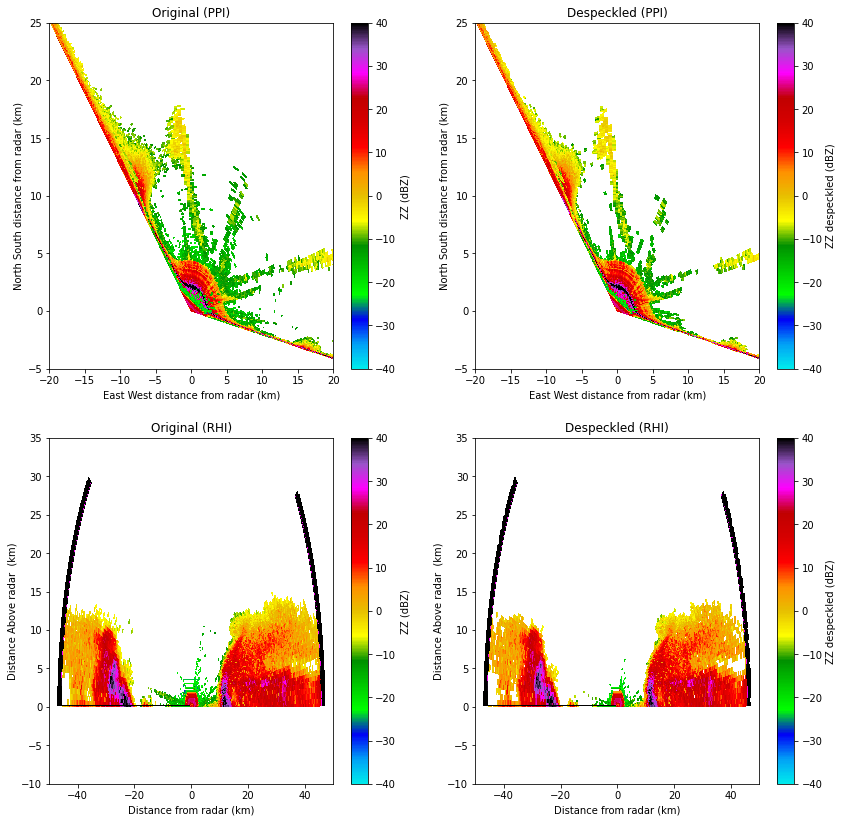

In [103]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-40, vmax=40, title="Original (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_despeckled', vmin=-40, vmax=40, title="Despeckled (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original (RHI)", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

ax = fig.add_subplot(224)
display.plot(field='ZZ_despeckled', vmin=-40, vmax=40, title="Despeckled (RHI)", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

plt.show()

# Testing ring zap with sample data

In [104]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]
expected_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [105]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, -3, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


In [106]:
from_km = 2
to_km = 9
input_data = [-3, 4, 6, -3, 8, -3, 10, 12, 14, -3, -3]
bad = -3
boundary_mask = [True, True, True, True, False, True, True, True, True, True, True]
expected_data = [-3, 4, -3, -3, 8, -3, -3, -3, -3, -3, -3]
output_data = solo.ring_zap(from_km, to_km, input_data, bad, boundary_mask)
assert (output_data.data == expected_data)
print("Correct")

Correct


# Test Ring Zap with Real Data

Run ring zap on all rays

In [90]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

from_km =  5 #@param {type: "number"}
to_km = 6 #@param {type: "number"}

kilometers_between_gates = radar.range['meters_between_gates'] / 1000
from_km_convert = int(from_km / kilometers_between_gates)
to_km_convert = int(to_km / kilometers_between_gates)

for i in range(len(rays_data_ZZ)):
    input_ZZ_data = rays_data_ZZ[i]
    boundary_mask = rays_mask_ZZ[i]

    # run despeckle
    ring_zap = solo.ring_zap(from_km, to_km, input_ZZ_data, missing_ZZ, boundary_mask, boundary_mask_all_true=True)
    output_ZZ_data.append(ring_zap.data)
    output_ZZ_mask.append(ring_zap.mask)

ring_zapped_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)


In [91]:
ring_zapped_mask_B = solo.ring_zap_masked(radar.fields['ZZ']['data'], from_km, to_km, kilometers_between_gates)

In [92]:
assert np.ma.allequal(ring_zapped_mask_B, ring_zapped_mask_A)

In [93]:
radar.add_field_like('ZZ', 'ZZ_ring_zapped', ring_zapped_mask_B, replace_existing=True)

assert ('ZZ_ring_zapped' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


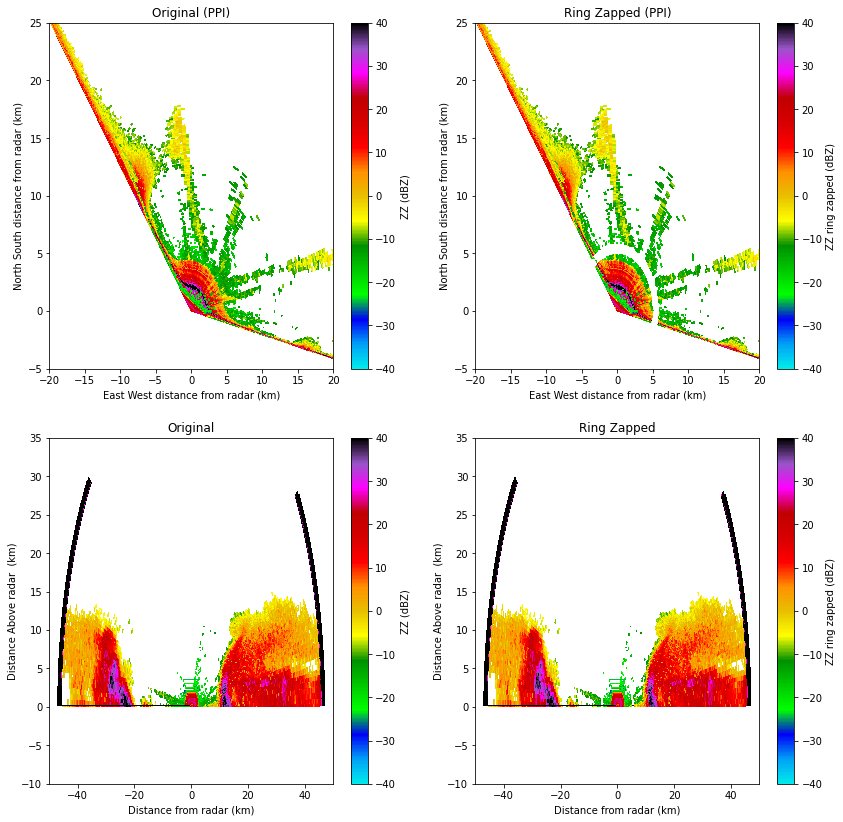

In [94]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-40, vmax=40, title="Original (PPI)", cmap='pyart_NWSRef')

display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_ring_zapped', vmin=-40, vmax=40, title="Ring Zapped (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot(field='ZZ', vmin=-40, vmax=40, title="Original", cmap='pyart_NWSRef')

display.set_limits((-50, 50), (-10, 35), ax=ax)

ax = fig.add_subplot(224)
display.plot(field='ZZ_ring_zapped', vmin=-40, vmax=40, title="Ring Zapped", cmap='pyart_NWSRef')
display.set_limits((-50, 50), (-10, 35), ax=ax)

plt.show()

# Test threshold field with sample data

Threshold uses an enum "Where" with values ABOVE, BELOW, and BETWEEN. Reference it as "solo.Where.BELOW" or do "`from... import...`" to shorten to "Where.BELOW"

In [74]:
from pysolo_package import Where

In [84]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  -3, -3, -3,  12, -3, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]


output_data = solo.threshold(Where.BELOW.value, 0.333, 0.000, input_data, thr_data, bad, boundary_mask, thr_bad=thr_bad)
assert output_data.data == expected_data
print("Correct")

Correct


In [79]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]

bad = -3
thr_bad = -5

boundary_mask = [False, False, False, False, False, False, False, False, False, False, False]

output_data = solo.threshold(Where.BELOW.value, 0.333, 0.000, input_data, thr_data, bad, boundary_mask)
assert output_data.data == expected_data
print("Correct")

Correct


In [80]:
input_data =    [-3,  4,  6, -3,  8,  -3, 10,  12, 14, -3, -3 ]
thr_data =      [-5, 30, 40, 60, -5,  70, -5, 110, -5, 10, 140]
expected_data = [-3, -3, -3, -3, -3, -3, -3, 12, -3, -3, -3]

bad = -3
thr_bad = -5

boundary_mask = [True, True, True, True, True, True, True, True, True, True, True]

output_data = solo.threshold(Where.BELOW.value, 50, 0.000, input_data, thr_data, bad, boundary_mask)
assert output_data.data == expected_data
print("Correct")

Correct


# Testing threshold field with real data

In [85]:
#@title Despeckle Parameters
output_ZZ_data = []
output_ZZ_mask = []

thr_1 =  -7 #@param {type: "number"}
thr_2 = 0 #@param {type: "number"}
total_changes = 0


for i in range(len(rays_data_ZZ)):
    input_ZZ_data = rays_data_ZZ[i]
    input_VV_data = rays_data_VV[i]
    boundary_mask = rays_mask_ZZ[i]

    # run despeckle
    threshold = solo.threshold(solo.Where.BELOW.value, 
                               thr_1, 
                               thr_2, 
                               input_ZZ_data, 
                               input_VV_data,
                               missing_ZZ, 
                               boundary_mask, 
                               boundary_mask_all_true=True)
    
    output_ZZ_data.append(threshold.data)
    output_ZZ_mask.append(threshold.mask)
    total_changes += threshold.changes


threshold_mask_A = np.ma.masked_array(data=output_ZZ_data, mask=output_ZZ_mask, fill_value=missing_ZZ)
print(total_changes)



0


In [86]:
threshold_mask_B = solo.threshold_masked(radar.fields['ZZ']['data'], radar.fields['VV']['data'], solo.Where.BELOW.value, thr_1, thr_2)

In [87]:
assert np.ma.allequal(threshold_mask_B, threshold_mask_A)

In [88]:
radar.add_field_like('ZZ', 'ZZ_threshold', threshold_mask_A, replace_existing=True)

assert ('ZZ_threshold' in radar.fields)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.7/site-packages/pyart/graph/radardisplay.py:104: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


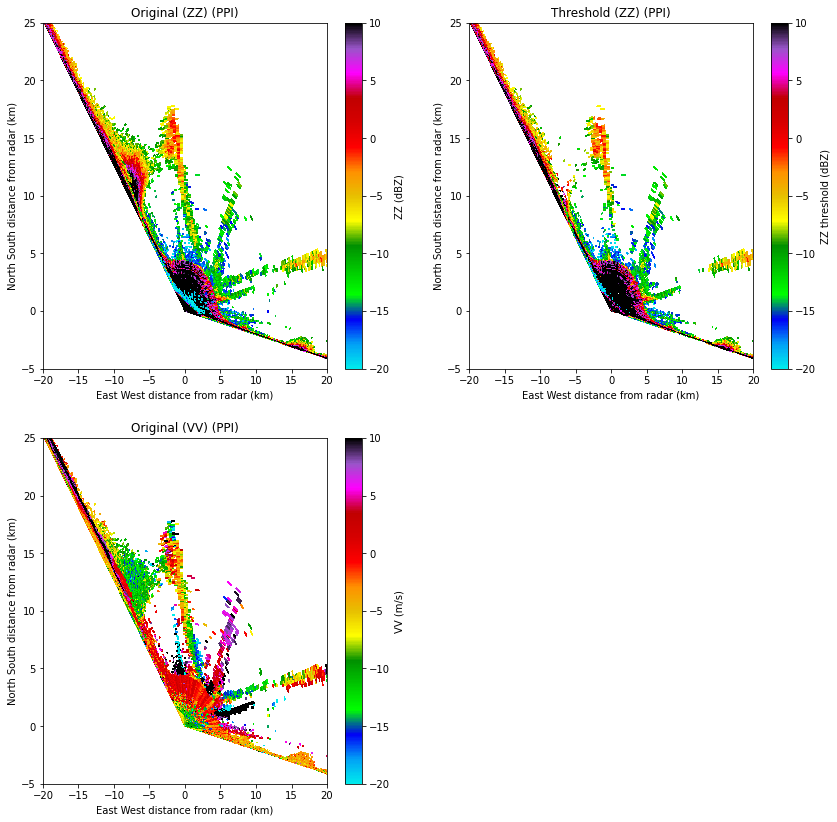

In [89]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=(14, 14))

ax = fig.add_subplot(221)
display.plot_ppi(field='ZZ', vmin=-20, vmax=10, title="Original (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(222)
display.plot_ppi(field='ZZ_threshold', vmin=-20, vmax=10, title="Threshold (ZZ) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

ax = fig.add_subplot(223)
display.plot_ppi(field='VV', vmin=-20, vmax=10, title="Original (VV) (PPI)", cmap='pyart_NWSRef')
display.set_limits((-20, 20), (-5, 25), ax=ax)

# plt.savefig('/content/drive/Shareddrives/Shared_with_Ammar/ZZ_despeckle.png')
plt.show()